## Introduction
This notebook was created for analysis and prediction making of the *Default of credit card clients Data Set* from UCI Machine Learning Library. The data set can be accessed separately from the UCI Machine Learning Repository page, [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

## Relevant Papers

In their paper "The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. (Yeh I. C. & Lien C. H.,2009)", which can be found [here](https://bradzzz.gitbooks.io/ga-dsi-seattle/content/dsi/dsi_05_classification_databases/2.1-lesson/assets/datasets/DefaultCreditCardClients_yeh_2009.pdf), Yeh I. C. & Lien C. H. review six data mining techniques (discriminant analysis, logistic regression, Bayesclassifier, nearest neighbor, artificial neural networks, and classification trees) and their applications on credit scoring. Then, using the real cardholders’ credit risk data in Tai-wan, they compare the classification accuracy among them.

## Attribute Information

Below there are the description of the attributes that will be used in our model for better understanding of the data:

- `LIMIT_BAL`: Amount of the given credit (NT dollar). It includes both the individual consumer credit and his/her family (supplementary) credit.
- `SEX`: Gender (1 = male; 2 = female).
- `EDUCATION`: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- `MARRIAGE`: Marital status (1 = married; 2 = single; 3 = others).
- `AGE`: Age (year).
- `PAY_1`: the repayment status in September, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `PAY_2`: the repayment status in August, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `PAY_3`: the repayment status in July, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `PAY_4`: the repayment status in June, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `PAY_5`: the repayment status in May, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `PAY_6`: the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- `BILL_AMT1`: Amount of bill statement (NT dollar). Amount of bill statement in September, 2005.
- `BILL_AMT2`: Amount of bill statement (NT dollar). Amount of bill statement in August, 2005.
- `BILL_AMT3`: Amount of bill statement (NT dollar). Amount of bill statement in July, 2005.
- `BILL_AMT4`: Amount of bill statement (NT dollar). Amount of bill statement in June, 2005.
- `BILL_AMT5`: Amount of bill statement (NT dollar). Amount of bill statement in May, 2005.
- `BILL_AMT6`: Amount of bill statement (NT dollar). Amount of bill statement in April, 2005.
- `PAY_AMT1`: Amount of previous payment (NT dollar). Amount paid in September, 2005.
- `PAY_AMT2`: Amount of previous payment (NT dollar). Amount paid in August, 2005.
- `PAY_AMT3`: Amount of previous payment (NT dollar). Amount paid in July, 2005.
- `PAY_AMT4`: Amount of previous payment (NT dollar). Amount paid in June, 2005.
- `PAY_AMT5`: Amount of previous payment (NT dollar). Amount paid in May, 2005.
- `PAY_AMT6`: Amount of previous payment (NT dollar). Amount paid in June, 2005.
- `dpnm`: Default payment next month.(Yes = 1, No = 0)

## Models

We will create 3 models in order to make predictions and compare them with the original paper. These models are:
- Logistic Regression
- Decision tree
- Neural Network

After the initial predictions, each model will be "optimized" by `GridSearchCV` estimator, which will search for the best set of hyperparameters for every model.  

## Metrics

In order to be consistent with the original paper and have the same base for our results, we will use the same metrics. These metrics are: Accuracy and F1 score. Accuracy is $\frac{Number of correct predictions}{Number of samples}$. When the dataset is imbalanced, accuracy may not be sufficient, because simply predicting all samples to be the major class can still get high accuracy. In such situation, a good metrics to use is f1 score. F1-score is calculated by $\frac{2*precision*recall}{precision+recall}$, where precision is $\frac{True Positives}{True Positives+False Positives}$ and recall is $\frac{True Positives}{True Positives+False Negatives}$.
Precision measures a model’s ability to correctly identify positive samples and recall measures the proportion of positive samples that are identified. F1-score ranges from 0 (cannot make true positive predictio) to 1 (being correct in all predictions). 

In addition to the above, we will use the cross-validation accuracy that `GridSeachCV` provides, while we compute confusion matrix for each model as well the Area Under the Curve (AUC) and plot the ROC curves. A typical ROC curve has False Positive Rate (FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis. The area covered by the curve is the area between the line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.

## Goal 

Using the models we created, we will try to predict the class value of `dpnm` column with better scores (accuracy and f1) than the scores presented in the original paper.

## Import libraries/packages 

In [1]:
### General libraries ###
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import graphviz 
from graphviz import Source
from IPython.display import SVG
import os

##################################

### ML Models ###
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree.export import export_text
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

##################################

### Metrics ###
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

## Part 1: Load and clean the data

In this section we will load the data from the csv file and check for any "impurities", such as null values or duplicate rows. If any of these will appear, we will remove them from the data set. We will also plot the correlations of the class column with all the other columns.

In [2]:
# Load the data.
data=pd.read_csv('default of credit card clients.csv')

# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dpnm         30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


Since the `ID` column is for indexing purposes only, we remove it from the data set.

In [3]:
# Drop "ID" column.
data=data.drop(['ID'], axis=1)

Now we check for duplicate rows. If any, we remove them from the data set, since they provide only reduntant information.

In [4]:
# Check for duplicate rows.
print(f"There are {data.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
data=data.drop_duplicates()
print("The duplicate rows were removed.")

There are 35 duplicate rows in the data set.
The duplicate rows were removed.


We also check for null values.

In [5]:
# Check for null values.
print(f"There are {data.isna().any().sum()} cells with null values in the data set.")

There are 0 cells with null values in the data set.


Below is the plot of the correlation matrix for the data set.

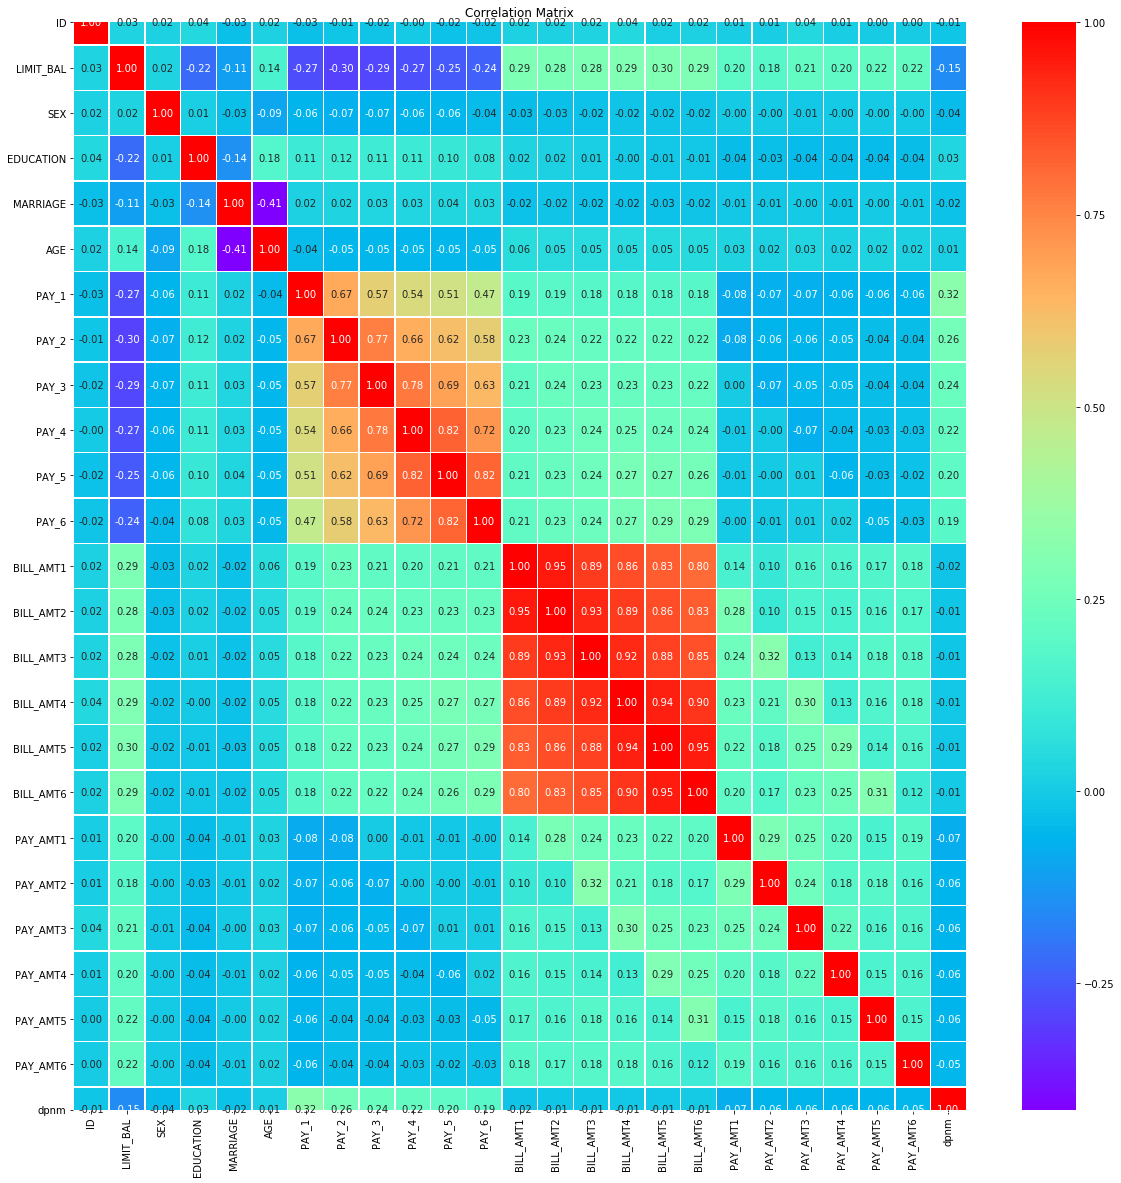

In [4]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True, cmap='rainbow',linewidth=0.5, fmt='.2f');
plt.title('Correlation Matrix');

## Part 2: Pre-processing

In this part we prepare our data for our models. This means that we choose the columns that will be our independed variables and which column the class that we want to predict. Once we are done with that, we split our data into train and test sets and perfom a standardization upon them.

In [5]:
# Distinguish attribute columns and class column.
X=data[data.columns[:-1]]
y=data['dpnm']

In [6]:
# Split to train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [7]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part 3: Modeling

In this section we build and try 3 models:
 - Logistic Regression
 - Decision tree
 - Neural network

Each model will be trained and make a prediction for the test set. Accuracy, f1 score, confusion matrix and ROC will be calculated for each model. Then we will use the `GridSearchCV` module to tune our models and search for the best hyperparameters in order to increase the accuracy of each model.

### Logistic Regression

In [10]:
# Initialize a Logistic Regression estimator.
logreg=LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)

# Train the estimator.
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=25,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [11]:
# Make predictions.
log_pred=logreg.predict(X_test)

#### Metrics

In [12]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % logreg.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % cross_val_score(logreg, X_train, y_train, cv=10).mean())

# Precision
print('Precision: %.3f' % precision_score(y_test, log_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, log_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, log_pred))

Accuracy: 0.808
Cross-validation accuracy: 0.811
Precision: 0.724
Recall: 0.232
F1 score: 0.351


In [13]:
# Predict probabilities for the test data.
logreg_probs = logreg.predict_proba(X_test)

# Keep Probabilities of the positive class only.
logreg_probs = logreg_probs[:, 1]

# Compute the AUC Score.
auc_logreg = roc_auc_score(y_test, logreg_probs)
print('AUC: %.2f' % auc_logreg)

AUC: 0.73


#### Confusion matrix for Logistic Regression

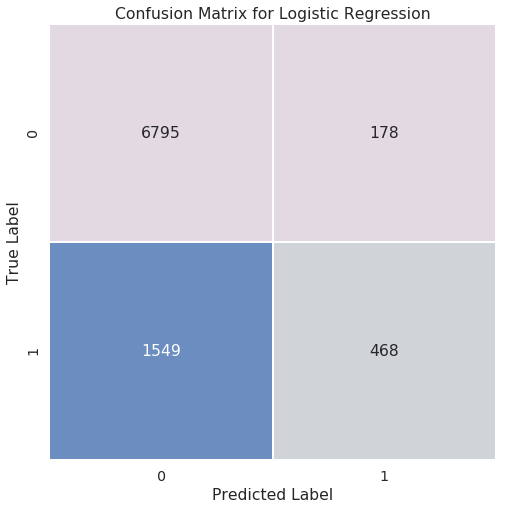

In [14]:
# Plot confusion matrix for Logistic Regression.
logreg_matrix = confusion_matrix(y_test,log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(logreg_matrix, annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression');

### Grid search for Logistic Regression

In [15]:
# Hyperparameters to be checked.
parameters = {'C':[0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['none','l2'] ,
              'solver':['lbfgs','sag','saga','newton-cg']}

# Logistic Regression estimator.
default_logreg=LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)

# GridSearchCV estimator.
gs_logreg = GridSearchCV(default_logreg, parameters, cv=10, n_jobs=-1, verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_logreg.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=25, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [16]:
# Make predictions with the best parameters.
gs_log_pred=gs_logreg.predict(X_test)

#### Metrics

In [17]:
# Best parameters.
print("Best Logistic Regression Parameters: {}".format(gs_logreg.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % gs_logreg.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_logreg.score(X_test,y_test)))

# Precision
print('Precision: %.3f' % precision_score(y_test, gs_log_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, gs_log_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, gs_log_pred))

Best Logistic Regression Parameters: {'C': 0.0001, 'penalty': 'none', 'solver': 'saga'}
Cross-validation accuracy: 0.811
Accuracy: 0.808
Precision: 0.724
Recall: 0.231
F1 score: 0.350


In [18]:
# Predict probabilities for the test data.
gs_logreg_probs = gs_logreg.predict_proba(X_test)

# Keep Probabilities of the positive class only.
gs_logreg_probs = gs_logreg_probs[:, 1]

# Compute the AUC Score.
gs_logreg_auc = roc_auc_score(y_test, gs_logreg_probs)
print('AUC: %.2f' % gs_logreg_auc)

AUC: 0.73


#### Confusion Matrix for GridSearchCV Logistic Regression

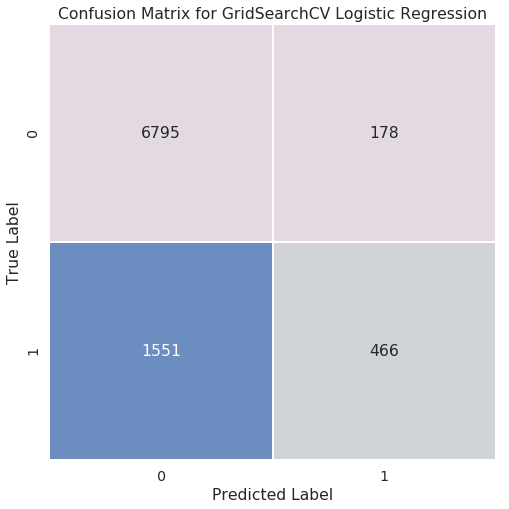

In [19]:
# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Logistic Regression');

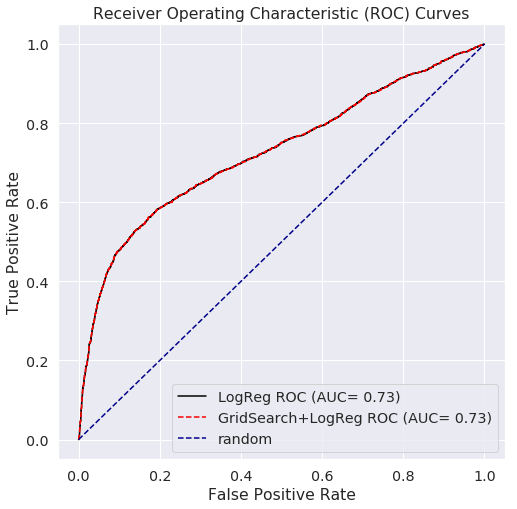

In [20]:
# Get the ROC curves.
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test, logreg_probs)
gs_logreg_fpr, gs_logreg_tpr, gs_logreg_thresholds = roc_curve(y_test, gs_logreg_probs)

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(logreg_fpr, logreg_tpr, color='black', label='LogReg ROC (AUC= %0.2f)'% auc_logreg)
plt.plot(gs_logreg_fpr, gs_logreg_tpr, color='red', linestyle='--',label='GridSearch+LogReg ROC (AUC= %0.2f)'% gs_logreg_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

### Decision tree

In [21]:
# Initialize a decision tree estimator.
tr = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=25)

# Train the estimator.
tr.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=25, splitter='best')

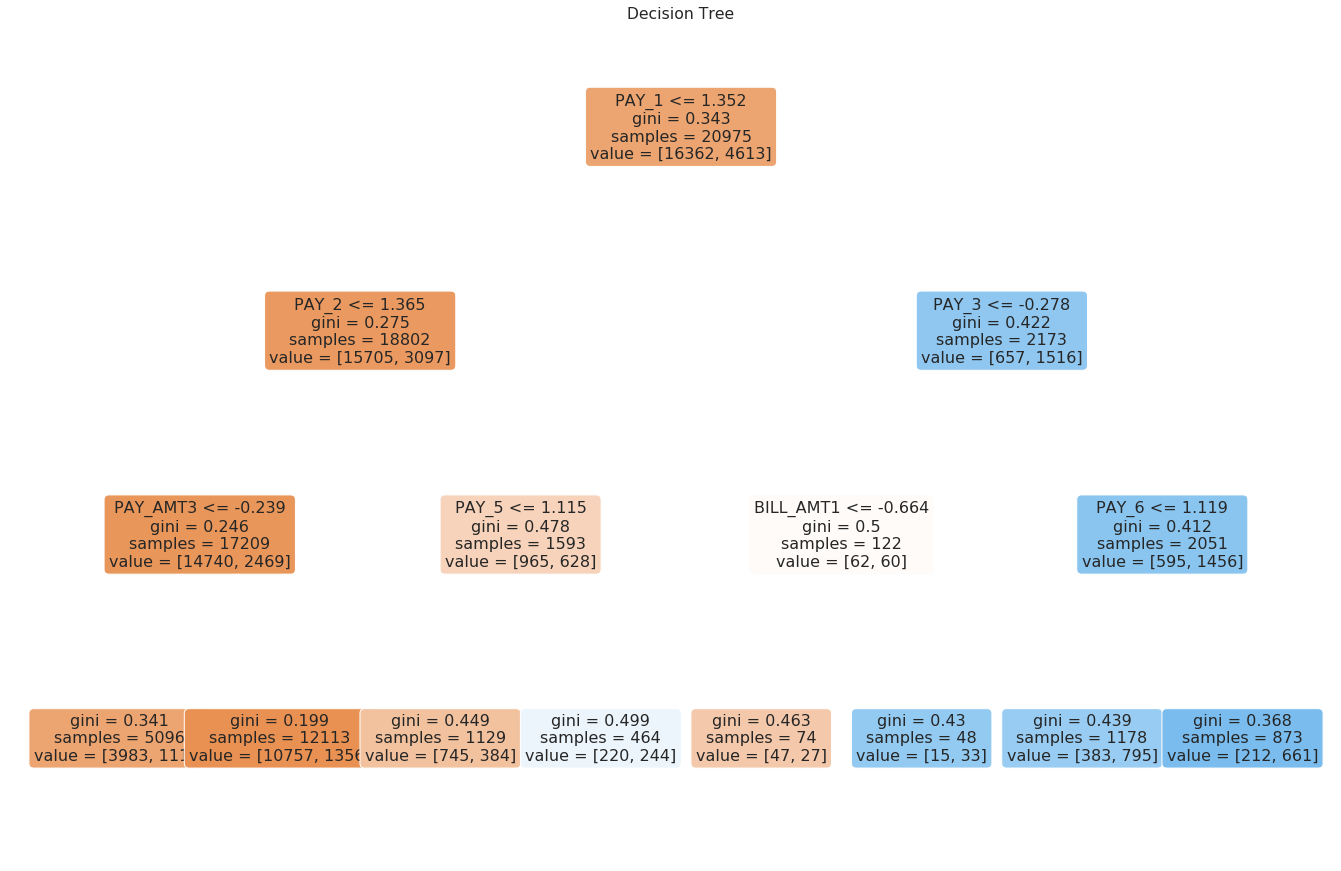

In [22]:
# Plot the tree.
fig=plt.figure(figsize=(23,15))
tree.plot_tree(tr.fit(X_train, y_train),feature_names=X.columns,filled=True,rounded=True,fontsize=16);
plt.title('Decision Tree');

In [23]:
# Print the tree in a simplified version.
r = export_text(tr, feature_names=X.columns.tolist())
print(r)

|--- PAY_1 <= 1.35
|   |--- PAY_2 <= 1.36
|   |   |--- PAY_AMT3 <= -0.24
|   |   |   |--- class: 0
|   |   |--- PAY_AMT3 >  -0.24
|   |   |   |--- class: 0
|   |--- PAY_2 >  1.36
|   |   |--- PAY_5 <= 1.11
|   |   |   |--- class: 0
|   |   |--- PAY_5 >  1.11
|   |   |   |--- class: 1
|--- PAY_1 >  1.35
|   |--- PAY_3 <= -0.28
|   |   |--- BILL_AMT1 <= -0.66
|   |   |   |--- class: 0
|   |   |--- BILL_AMT1 >  -0.66
|   |   |   |--- class: 1
|   |--- PAY_3 >  -0.28
|   |   |--- PAY_6 <= 1.12
|   |   |   |--- class: 1
|   |   |--- PAY_6 >  1.12
|   |   |   |--- class: 1



In [24]:
# Make predictions.
tr_pred=tr.predict(X_test)

#### Metrics

In [25]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % tr.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % cross_val_score(tr, X_train, y_train, cv=10).mean())

# Precision
print('Precision: %.3f' % precision_score(y_test, tr_pred))

# Recall
print('Precision: %.3f' % recall_score(y_test, tr_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, tr_pred))

Accuracy: 0.818
Cross-validation accuracy: 0.822
Precision: 0.671
Precision: 0.375
F1 score: 0.481


In [26]:
# Predict propabilities for the test data.
tr_probs = tr.predict_proba(X_test)

# Keep Probabilities of the positive class only.
tr_probs = tr_probs[:, 1]

# Compute the AUC Score.
auc_tr = roc_auc_score(y_test, tr_probs)
print('AUC: %.2f' % auc_tr)

AUC: 0.73


#### Confusion Matrix for Decision tree

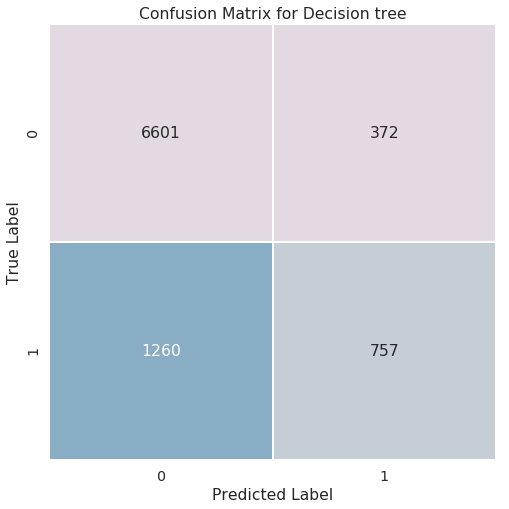

In [27]:
# Print confusion matrix for Decision tree.
tr_matrix = confusion_matrix(y_test,tr_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

### Grid search for Decision tree

In [28]:
# Hyperparameters to be checked.
parameters = {'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

# MLP estimator.
default_tr = tree.DecisionTreeClassifier(random_state=25)

# GridSearchCV estimator.
gs_tree = GridSearchCV(default_tr, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_tree.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   55.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=25,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
  

In [29]:
# Make predictions with the best parameters.
gs_tree_pred=gs_tree.predict(X_test)

#### Metrics

In [30]:
# Best parameters.
print("Best Decision tree Parameters: {}".format(gs_tree.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % gs_tree.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_tree.score(X_test,y_test)))

# Precision
print('Precision: %.3f' % precision_score(y_test, gs_tree_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, gs_tree_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, gs_tree_pred))

Best Decision tree Parameters: {'criterion': 'entropy', 'max_depth': 4}
Cross-validation accuracy: 0.822
Accuracy: 0.817
Precision: 0.698
Recall: 0.326
F1 score: 0.445


In [31]:
# Predict probabilities for the test data.
gs_tree_probs = gs_tree.predict_proba(X_test)

# Keep Probabilities of the positive class only.
gs_tree_probs = gs_tree_probs[:, 1]

# Compute the AUC Score.
gs_tree_auc = roc_auc_score(y_test, gs_tree_probs)
print('AUC: %.2f' % gs_tree_auc)

AUC: 0.75


#### Confusion Matrix for GridSearchCV Decision tree

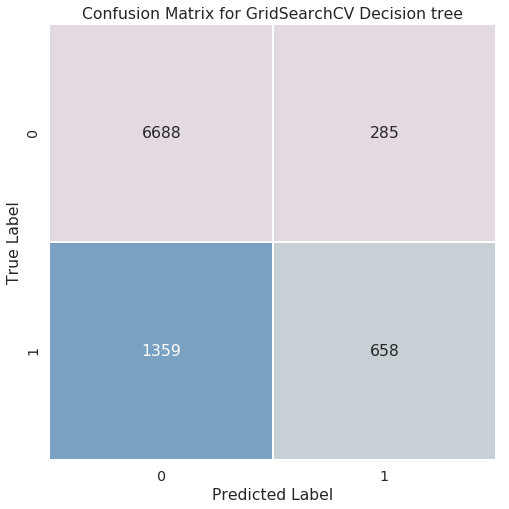

In [32]:
# Print confusion matrix for Decision tree.
gs_tr_matrix = confusion_matrix(y_test,gs_tree_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Decision tree');

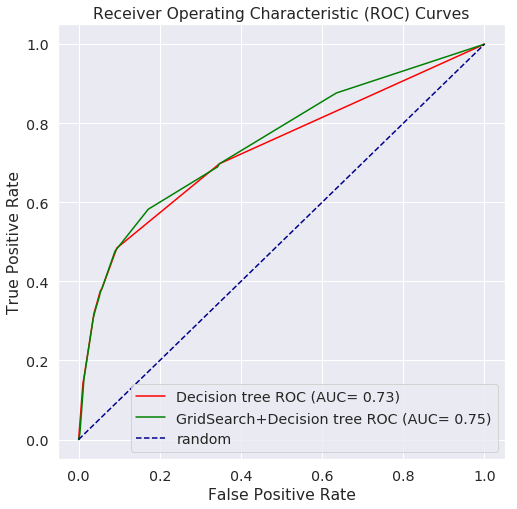

In [33]:
# Get the ROC Curves.
gs_tr_fpr, gs_tr_tpr, gs_tr_thresholds = roc_curve(y_test, gs_tree_probs)
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_test, tr_probs)

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(tr_fpr, tr_tpr, color='red', label='Decision tree ROC (AUC= %0.2f)'% auc_tr)
plt.plot(gs_tr_fpr, gs_tr_tpr, color='green', label='GridSearch+Decision tree ROC (AUC= %0.2f)'% gs_tree_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

### Neural network

In [34]:
# Initialize a Multi-layer Perceptron classifier.
mlp = MLPClassifier(hidden_layer_sizes=(12,5),max_iter=1000, random_state=25,shuffle=True, verbose=False)

# Train the classifier.
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=25, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
# Make predictions.
mlp_pred = mlp.predict(X_test)

#### Metrics

In [36]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % mlp.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % cross_val_score(mlp, X_train, y_train, cv=10).mean())

# Precision
print('Precision: %.3f' % precision_score(y_test, mlp_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, mlp_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, mlp_pred))

Accuracy: 0.818
Cross-validation accuracy: 0.820
Precision: 0.662
Recall: 0.383
F1 score: 0.485


In [37]:
# Predict probabilities for the test data.
mlp_probs = mlp.predict_proba(X_test)

# Keep probabilities of the positive class only.
mlp_probs = mlp_probs[:, 1]

# Compute the AUC Score.
auc_mlp = roc_auc_score(y_test, mlp_probs)
print('AUC: %.2f' % auc_mlp)

AUC: 0.77


#### Confusion Matrix for Multi-layer Perceptron

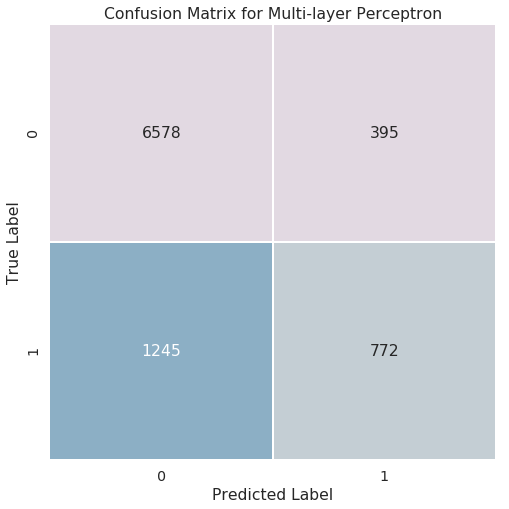

In [38]:
# Print confusion matrix for Multi-layer Perceptron.
matrix = confusion_matrix(y_test,mlp_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Multi-layer Perceptron');

### Grid search for Neural network

In [39]:
# Hyperparameters to be checked.
parameters = {'activation':['logistic','relu'],'solver': ['lbfgs','adam','sgd'],
              'alpha':10.0 ** -np.arange(1,3),
              'hidden_layer_sizes':[(23),(12,5),(12,5,2),(3,1),(5)]}

# Decision tree estimator.
default_mlp = MLPClassifier(random_state=42)

# GridSearchCV estimator.
gs_mlp = GridSearchCV(default_mlp, parameters, cv=10, n_jobs=-1,verbose=10)

# Train the GridSearchCV estimator and search for the best parameters.
gs_mlp.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  6

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...ffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                

In [40]:
# Make predictions with the best parameters.
gs_mlp_pred=gs_mlp.predict(X_test)

#### Metrics

In [41]:
# Best parameters.
print("Best MLP Parameters: {}".format(gs_mlp.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % gs_mlp.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_mlp.score(X_test,y_test)))

# Precision
print('Precision: %.3f' % precision_score(y_test, gs_mlp_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, gs_mlp_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, gs_mlp_pred))

Best MLP Parameters: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (12, 5), 'solver': 'adam'}
Cross-validation accuracy: 0.822
Accuracy: 0.817
Precision: 0.677
Recall: 0.355
F1 score: 0.466


In [42]:
# Predict probabilities for the test data.
gs_mlp_probs = gs_mlp.predict_proba(X_test)

# Keep Probabilities of the positive class only.
gs_mlp_probs = gs_mlp_probs[:, 1]

# Compute the AUC Score.
gs_mlp_auc = roc_auc_score(y_test, gs_mlp_probs)
print('AUC: %.2f' % gs_mlp_auc)

AUC: 0.78


#### Confusion Matrix for GridSearchCV Multi-layer Perceptron

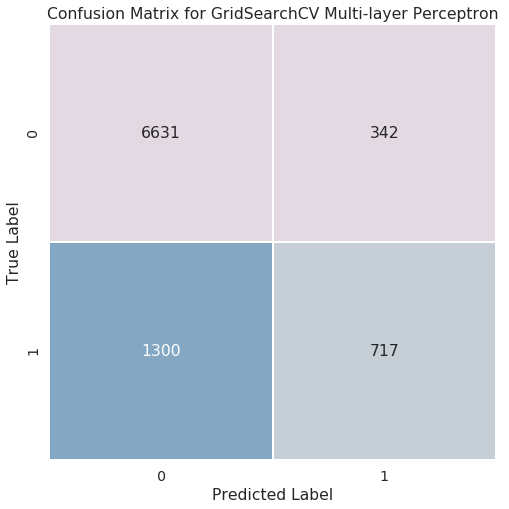

In [43]:
# Plot confusion matrix for GridSearchCV Multi-layer Perceptron.
matrix = confusion_matrix(y_test,gs_mlp_pred)
plt.figure(figsize=(8,8))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Multi-layer Perceptron');

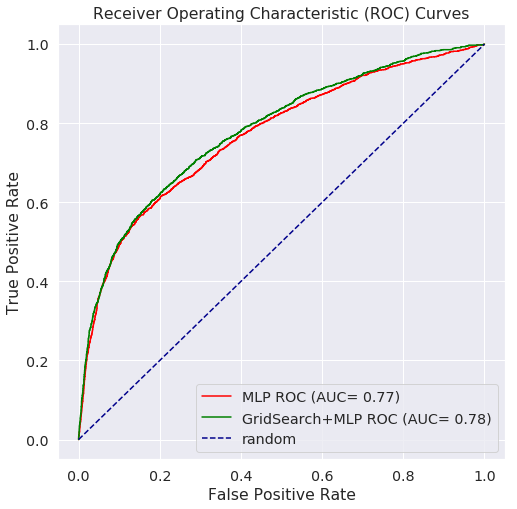

In [44]:
# Get the ROC curves.
gs_mlp_fpr, gs_mlp_tpr,gs_mlp_thresholds = roc_curve(y_test, gs_mlp_probs)
mlp_fpr, mlp_tpr, mlp_thresholds = roc_curve(y_test, mlp_probs)

# Plot the ROC curve.
plt.figure(figsize=(8,8))
plt.plot(mlp_fpr, mlp_tpr, color='red', label='MLP ROC (AUC= %0.2f)'% auc_mlp)
plt.plot(gs_mlp_fpr, gs_mlp_tpr, color='green', label='GridSearch+MLP ROC (AUC= %0.2f)'% gs_mlp_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

## Summary

In [45]:
metrics=['Accuracy', 'CV accuracy', 'Precision','Recall','F1','ROC AUC']

# Plot metrics.
fig = go.Figure(data=[
    go.Bar(name='Logistic Regression', x=metrics,
           y=[logreg.score(X_test, y_test),cross_val_score(logreg, X_train, y_train, cv=10).mean(),precision_score(y_test, log_pred),recall_score(y_test, log_pred),f1_score(y_test, log_pred),auc_logreg]),
    go.Bar(name='Decision tree', x=metrics,
           y=[tr.score(X_test, y_test),cross_val_score(tr, X_train, y_train, cv=10).mean(),precision_score(y_test, tr_pred),recall_score(y_test, tr_pred),f1_score(y_test, tr_pred),auc_tr]),
    go.Bar(name='Neural Network', x=metrics,
           y=[mlp.score(X_test, y_test),cross_val_score(mlp, X_train, y_train, cv=10).mean(),precision_score(y_test, mlp_pred),recall_score(y_test, mlp_pred),f1_score(y_test, mlp_pred),auc_mlp]),
    go.Bar(name='GridSearchCV+Logistic Regression',
           x=metrics, y=[gs_logreg.score(X_test,y_test),gs_logreg.best_score_,precision_score(y_test, gs_log_pred),recall_score(y_test, gs_log_pred),f1_score(y_test, gs_log_pred),gs_logreg_auc]),
    go.Bar(name='GridSearchCV+Decision tree',
           x=metrics, y=[gs_tree.score(X_test,y_test),gs_tree.best_score_,precision_score(y_test, gs_tree_pred),recall_score(y_test, gs_tree_pred), f1_score(y_test, gs_tree_pred),gs_tree_auc]),
    go.Bar(name='GridSearchCV+Neural Network',
           x=metrics, y=[gs_mlp.score(X_test,y_test),gs_mlp.best_score_,precision_score(y_test, gs_mlp_pred),recall_score(y_test, gs_mlp_pred), f1_score(y_test, gs_mlp_pred),gs_mlp_auc]),
    
])

fig.update_layout(title_text='Metrics for GridSearchCV',
                  barmode='group',xaxis_tickangle=-45,bargroupgap=0.05)
fig.show()

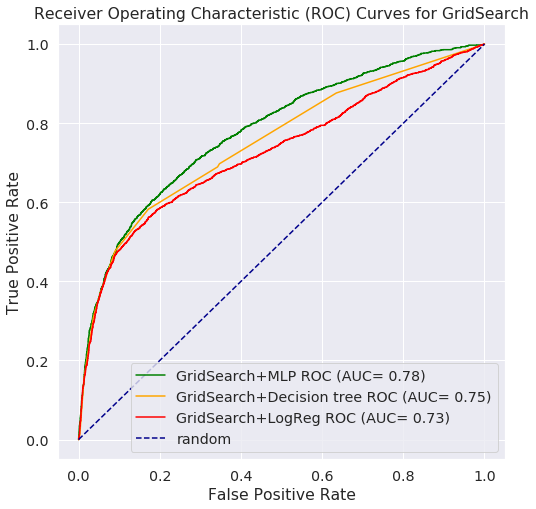

In [46]:
# Plot the ROC curve.
plt.figure(figsize=(8,8))
plt.plot(gs_mlp_fpr, gs_mlp_tpr, color='green', label='GridSearch+MLP ROC (AUC= %0.2f)'% gs_mlp_auc)
plt.plot(gs_tr_fpr, gs_tr_tpr, color='orange', label='GridSearch+Decision tree ROC (AUC= %0.2f)'% gs_tree_auc)
plt.plot(gs_logreg_fpr, gs_logreg_tpr, color='red',label='GridSearch+LogReg ROC (AUC= %0.2f)'% gs_logreg_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for GridSearch')
plt.legend()
plt.show()

## Results

|                                     | Accuracy | CV Accuracy | Precision | Recall |   F1  | ROC AUC |
|-------------------------------------|:--------:|:-----------:|:---------:|:------:|:-----:|:-------:|
| Logistic Regression                 |   0.807  |    0.811    |   0.724   |  0.232 | 0.351 |  0.727  |
| GridSearchCV + Logistic Regression  |   0.807  |    0.811    |   0.723   |  0.231 | 0.350 |  0.726  |
| Decision Tree                       |   0.818  |    0.821    |   0.670   |  0.375 | 0.481 |  0.733  |
| GridSearchCV + Decision Tree        |   0.817  |    0.822    |   0.697   |  0.326 | 0.444 |  0.751  |
| Neural Network (MLP)                |   0.817  |    0.819    |   0.661   |  0.382 | 0.484 |  0.768  |
| GridSearchCV + Neural Network (MLP) |   0.817  |    0.821    |   0.677   |  0.355 | 0.466 |  0.780  |